In [65]:
pip install ucimlrepo

In [66]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [67]:
import pandas as pd
# Convert X to a DataFrame (if it's not already one)
X = pd.DataFrame(X)
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  camp

In [68]:
# Drop the contact column
X = X.drop(columns=['contact'])
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  duration  campaign  pdays

In [69]:
# Replace missing values in 'pdays' and 'poutcome' columns with their mode
X['pdays'] = X['pdays'].fillna(X['pdays'].mode()[0])

In [70]:
print(X)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  duration  campaign  pdays

In [71]:
df = pd.DataFrame(X)

# Remove rows where 'education' is NaN
df_cleaned = df.dropna(subset=['education'])

# Display the cleaned DataFrame
print(df_cleaned)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
5       35    management   married   tertiary      no      231     yes   no   
6       28    management    single   tertiary      no      447     yes  yes   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

       day_of_week month  duration  campaign  pdays

In [72]:
# y = y.loc[X.index]
# X['y'] = y

In [73]:
# print(X.head)

In [74]:
# # Separate numerical and categorical columns
# numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# print("Numerical Features:", numerical_columns)
# print("Categorical Features:", categorical_columns)


In [75]:
# from scipy.stats import chi2_contingency
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Loop through each categorical column
# for col in categorical_columns:
#     if col != 'y':  # Skip the target column itself
#         print(f"Analyzing relationship between '{col}' and 'y'...")

#         # Cross-tabulation
#         crosstab = pd.crosstab(X[col], X['y'])
#         print(crosstab)

#         # Perform Chi-Square Test
#         chi2, p, dof, expected = chi2_contingency(crosstab)
#         print(f"Chi-Square Statistic = {chi2}, p-value = {p}\n")

#         # Visualization: Bar plot
#         sns.countplot(x=col, hue='y', data=X)
#         plt.title(f"{col} vs Target (y)")
#         plt.xticks(rotation=45)
#         plt.show()


In [76]:
# Convert 'y' to numerical values
# X['y'] = X['y'].map({'yes': 1, 'no': 0})


In [77]:
# # Correlation
# correlations = X[numerical_columns + ['y']].corr()['y'].sort_values()
# print("Correlation with target (y):")
# print(correlations)

# # Visualization: Box plot and scatter plot
# for col in numerical_columns:
#     sns.boxplot(x='y', y=col, data=X)
#     plt.title(f"{col} vs Target (y) - Box Plot")
#     plt.show()

#     sns.scatterplot(x=col, y='y', data=X)
#     plt.title(f"{col} vs Target (y) - Scatter Plot")
#     plt.show()


In [80]:
# Add 'y' column back to df_cleaned
df_cleaned['y'] = y

# Display the updated DataFrame
print(df_cleaned.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
5   35    management  married   tertiary      no      231     yes   no   
6   28    management   single   tertiary      no      447     yes  yes   

   day_of_week month  duration  campaign  pdays  previous poutcome   y  
0            5   may       261         1     -1         0      NaN  no  
1            5   may       151         1     -1         0      NaN  no  
2            5   may        76         1     -1         0      NaN  no  
5            5   may       139         1     -1         0      NaN  no  
6            5   may       217         1     -1         0      NaN  no  


<ipython-input-80-fdb65283eb9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['y'] = y


Analyzing relationship between 'job' and 'y'...
y                no   yes
job                      
admin.         4387   613
blue-collar    8603   675
entrepreneur   1295   116
housemaid      1090   105
management     7963  1253
retired        1659   486
self-employed  1358   182
services       3654   350
student         549   226
technician     6538   817
unemployed     1076   198
Chi-Square Statistic = 772.4886316546689, p-value = 1.690329500153999e-159



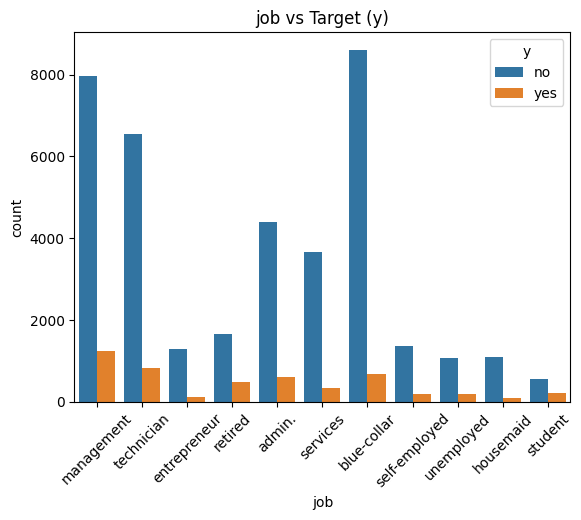

Analyzing relationship between 'marital' and 'y'...
y            no   yes
marital              
divorced   4440   598
married   23441  2613
single    10436  1826
Chi-Square Statistic = 192.32645955565454, p-value = 1.72520197040569e-42



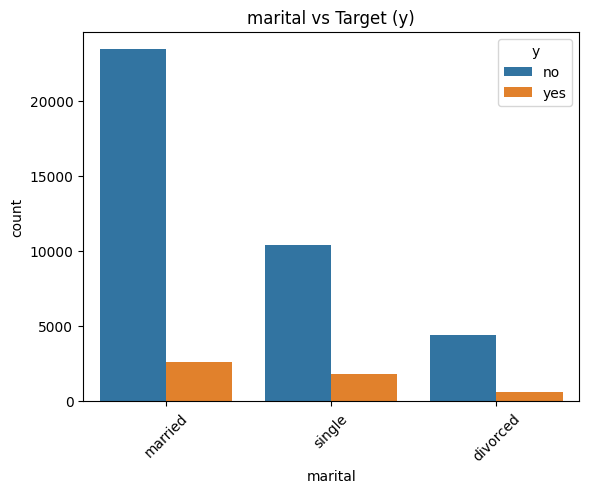

Analyzing relationship between 'education' and 'y'...
y             no   yes
education             
primary     6260   591
secondary  20752  2450
tertiary   11305  1996
Chi-Square Statistic = 233.74651791939363, p-value = 1.7481896783696894e-51



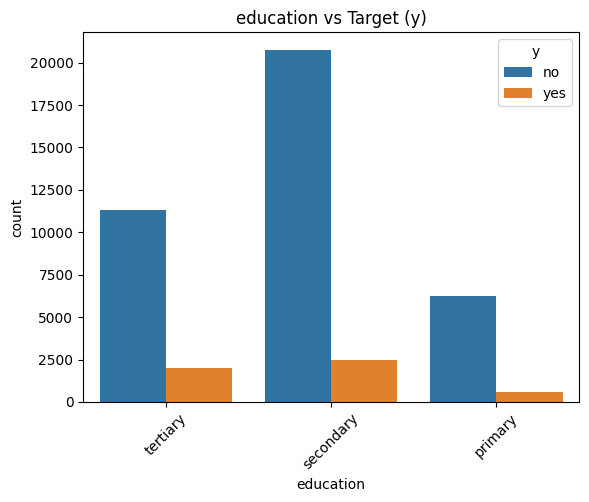

Analyzing relationship between 'default' and 'y'...
y           no   yes
default             
no       37582  4989
yes        735    48
Chi-Square Statistic = 22.847577502380798, p-value = 1.7537022597926978e-06



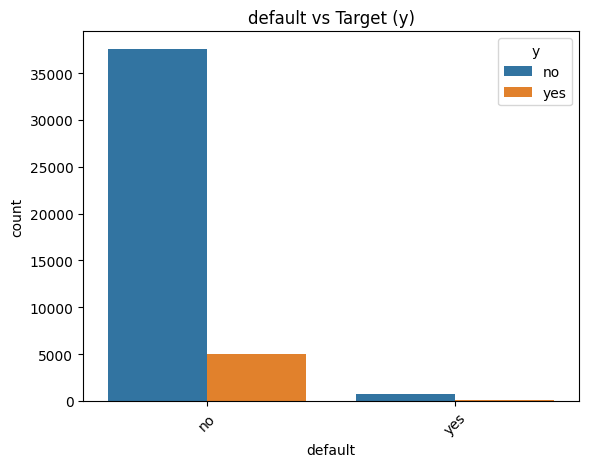

Analyzing relationship between 'housing' and 'y'...
y           no   yes
housing             
no       15883  3161
yes      22434  1876
Chi-Square Statistic = 819.4361590025637, p-value = 3.2088768604772657e-180



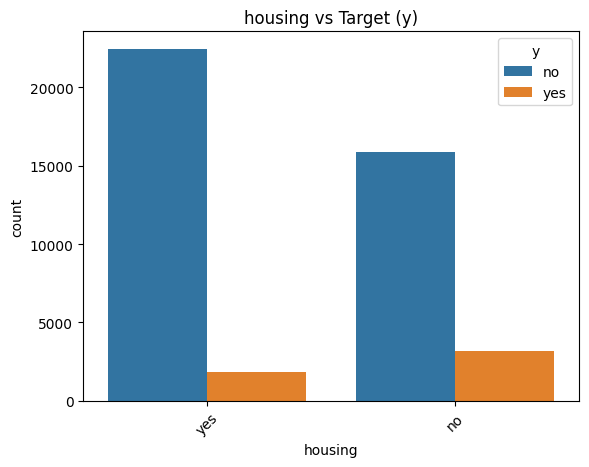

Analyzing relationship between 'loan' and 'y'...
y        no   yes
loan             
no    31681  4562
yes    6636   475
Chi-Square Statistic = 201.45845257668554, p-value = 1.0036228442332127e-45



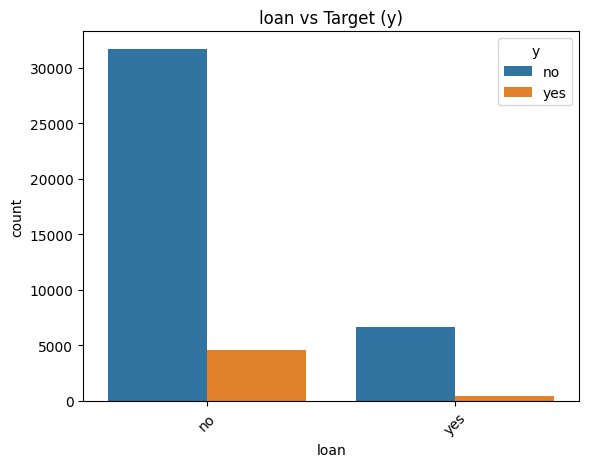

Analyzing relationship between 'month' and 'y'...
y         no  yes
month            
apr     2278  544
aug     5410  660
dec      107   93
feb     2122  421
jan     1193  134
jul     6035  586
jun     4502  524
mar      209  242
may    12320  890
nov     3459  392
oct      398  298
sep      284  253
Chi-Square Statistic = 2930.2693922895974, p-value = 0.0



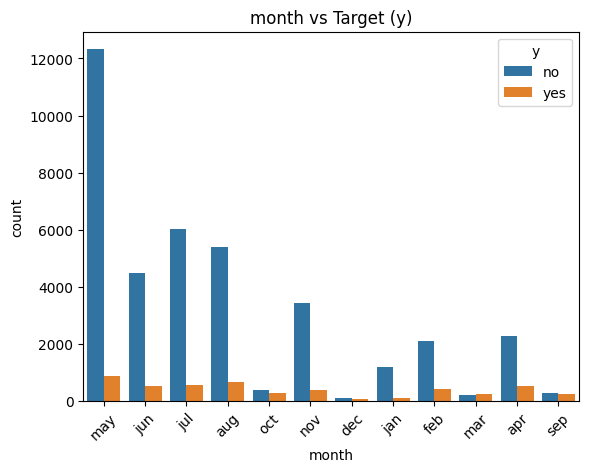

Analyzing relationship between 'poutcome' and 'y'...
y           no  yes
poutcome           
failure   4134  590
other     1481  294
success    507  923
Chi-Square Statistic = 1740.8899942957441, p-value = 0.0



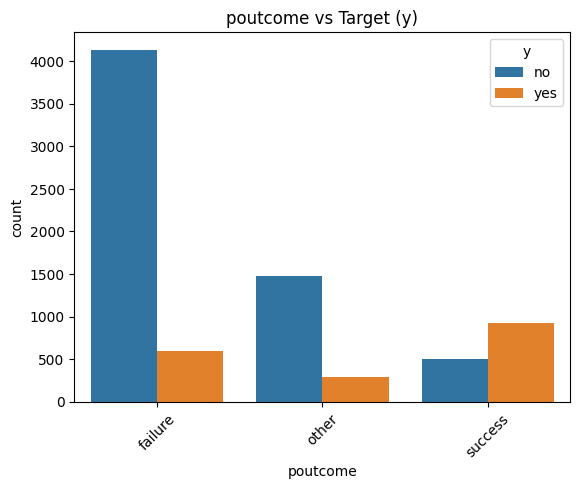

In [81]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each categorical column
for col in categorical_columns:
    if col != 'y':  # Skip the target column itself
        print(f"Analyzing relationship between '{col}' and 'y'...")

        # Cross-tabulation
        crosstab = pd.crosstab(df_cleaned[col], df_cleaned['y'])
        print(crosstab)

        # Perform Chi-Square Test
        chi2, p, dof, expected = chi2_contingency(crosstab)
        print(f"Chi-Square Statistic = {chi2}, p-value = {p}\n")

        # Visualization: Bar plot
        sns.countplot(x=col, hue='y', data=df_cleaned)
        plt.title(f"{col} vs Target (y)")
        plt.xticks(rotation=45)
        plt.show()


Analyzing relationship between 'age' and 'y'...


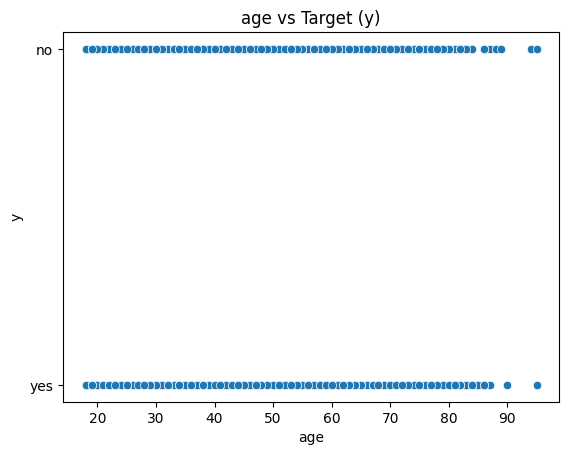

Analyzing relationship between 'balance' and 'y'...


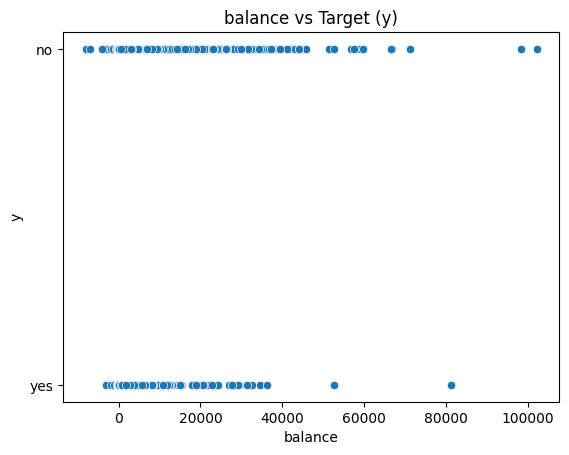

Analyzing relationship between 'duration' and 'y'...


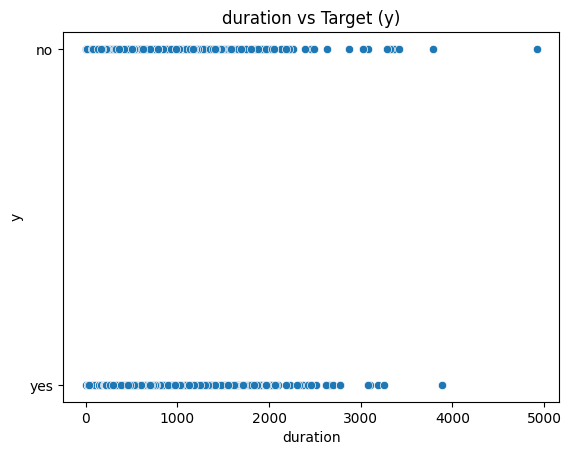

Analyzing relationship between 'campaign' and 'y'...


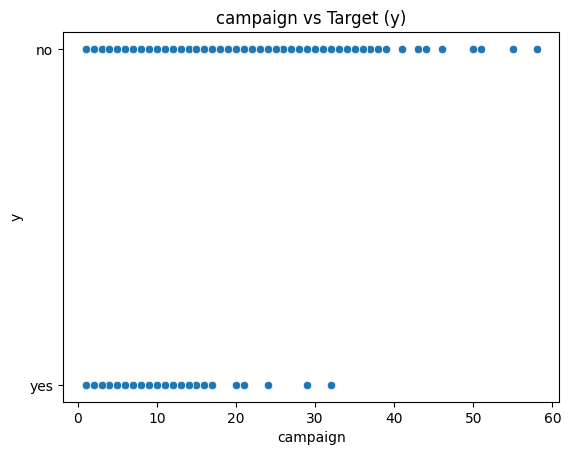

Analyzing relationship between 'pdays' and 'y'...


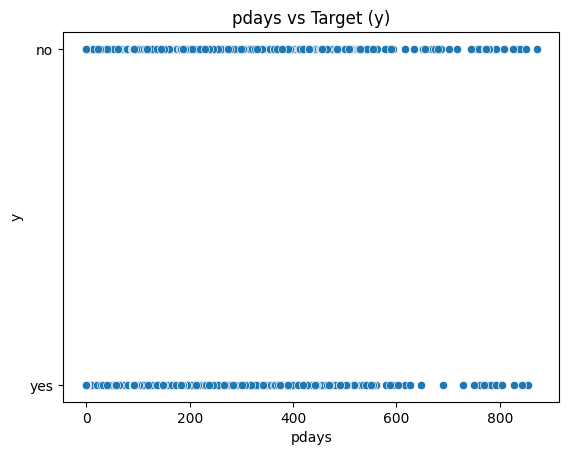

Analyzing relationship between 'previous' and 'y'...


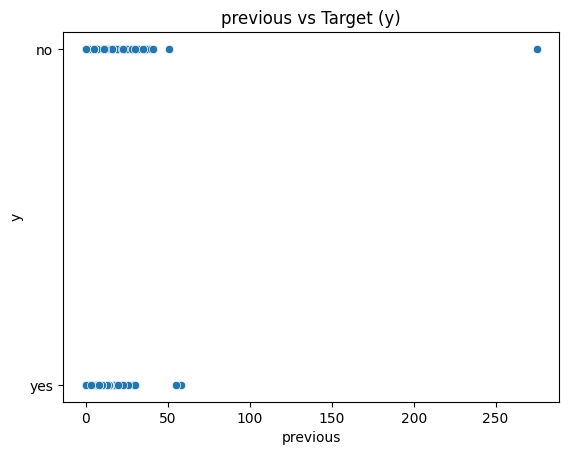

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numerical column
for col in numerical_columns:
    print(f"Analyzing relationship between '{col}' and 'y'...")

    # Scatter plot
    sns.scatterplot(x=col, y='y', data=df_cleaned)
    plt.title(f"{col} vs Target (y)")
    plt.xlabel(col)
    plt.ylabel("y")
    plt.show()


In [84]:
 from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    df_cleaned.drop(columns=['y']),  # Features
    df_cleaned['y'],                # Target
    test_size=0.2,                  # 20% test data
    random_state=42                 # For reproducibility
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (34683, 15)
Testing data shape: (8671, 15)


In [87]:
categorical_columns = X_train.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']


In [92]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
encoder = LabelEncoder()

# Encode categorical columns for both train and test
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

print("Training Data after Label Encoding:")
print(X_train.head())

print("\nTesting Data after Label Encoding:")
print(X_test.head())



Training Data after Label Encoding:
       age  job  marital  education  default  balance  housing  loan  \
15635   30    1        1          1        0      658        1     1   
29426   36    1        1          1        0      414        0     0   
33302   34    1        1          1        0      965        1     0   
39068   24    7        1          1        0     1354        1     1   
19012   60    1        1          1        0     2879        1     0   

       day_of_week  month  duration  campaign  pdays  previous  poutcome  
15635           21      5       212         1     -1         0         3  
29426            3      3       136         3     -1         0         3  
33302           20      0       372         2    332         2         1  
39068           18      8       239         2     -1         0         3  
19012            5      1       122         1     -1         0         3  

Testing Data after Label Encoding:
       age  job  marital  education  default 

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.9046
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7638
         yes       0.68      0.38      0.49      1033

    accuracy                           0.90      8671
   macro avg       0.80      0.68      0.72      8671
weighted avg       0.89      0.90      0.89      8671

